In [ ]:
'''Prepare a classification model using the Naive Bayes algorithm for the salary dataset. 
Train and test datasets are given separately. Use both for model building. And predict Salary'''

In [3]:
#  importing all the required libraries and modules

In [17]:
# import necessary libraries
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for advance data visualization

# import necessary modules from scilit-learn 
from sklearn.impute import SimpleImputer # for imputing missing values 
from sklearn.preprocessing import OneHotEncoder # for one hot encoding categorical features
from sklearn.preprocessing import MinMaxScaler # for scaling the numerical features
from sklearn.compose import ColumnTransformer # for applying transformations to specific columns
from sklearn.model_selection import train_test_split # spliting the data into train and test
from sklearn.pipeline import Pipeline # for construting a pipeline of transformers
from feature_engine.outliers import Winsorizer
# for model selecting and evaluation
from sklearn.naive_bayes import MultinomialNB 

import sklearn.metrics as skmet # for evaluating model performance

# for saving the model 
import joblib
import pickle

# for auto EDA 
import sweetviz

# for mysql database connection
from urllib.parse import quote
from sqlalchemy import create_engine



In [18]:
# loading the training and testing datasets into pandas dataframe
Traindata = pd.read_csv(r"C:\Users\uttam\Desktop\naive bayes (assignment)\naive bayes (3)\SalaryData_Train.csv")
Testdata = pd.read_csv(r"C:\Users\uttam\Desktop\naive bayes (assignment)\naive bayes (3)\SalaryData_Test.csv")

In [21]:
Traindata.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
Traindata.shape

(30161, 14)

In [25]:
Testdata.shape

(15060, 14)

In [27]:
# auto EDA
report = sweetviz.analyze(Traindata)
html_report = report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
report = sweetviz.analyze(Testdata)
html_report = report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [40]:
# splitting data into X and Y (features and target)
X_train = Traindata.drop(['Salary'], axis = 1)
Y_train = Traindata[['Salary']]

In [42]:
X_test = Testdata.drop(['Salary'], axis = 1)
Y_test = Testdata[['Salary']]

In [44]:
from sklearn.preprocessing import LabelEncoder
# creating an instance of label encoder
labelencoder = LabelEncoder()
Y_train['Salary'] = labelencoder.fit_transform(Y_train['Salary'])

C:\Users\uttam\AppData\Local\Temp\ipykernel_4936\1726793100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train['Salary'] = labelencoder.fit_transform(Y_train['Salary'])


In [46]:
Y_train.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [48]:
Y_test['Salary'] = labelencoder.fit_transform(Y_test['Salary'])


C:\Users\uttam\AppData\Local\Temp\ipykernel_4936\3007360547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_test['Salary'] = labelencoder.fit_transform(Y_test['Salary'])


In [50]:
Y_test.head()

,Salary
0,0
1,0
2,1
3,1
4,0


In [58]:
# seperating numeric and non numeric columns
numerical_features = X_train.select_dtypes(exclude = 'object').columns

In [62]:
numerical_features

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

In [64]:
categorical_features = X_train.select_dtypes(include = 'object').columns

In [66]:
categorical_features

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [68]:
# preprocessing pipeline
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean')), ('scale', MinMaxScaler())])
cat_pipeline = Pipeline(steps = [('encoding', OneHotEncoder(sparse_output = False))])

In [70]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numerical_features), ('cat', cat_pipeline, categorical_features)])

In [72]:
X_train_processed = preprocessor.fit(X_train)

In [74]:
joblib.dump(X_train_processed, 'Data26')

['Data26']

In [76]:
# apply preprocessing on training dataset
Xtr = pd.DataFrame(X_train_processed.transform(X_train), columns = X_train_processed.get_feature_names_out())

In [78]:
Xtr.head()

,num__age,num__educationno,num__capitalgain,num__capitalloss,num__hoursperweek,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,...,cat__native_ Portugal,cat__native_ Puerto-Rico,cat__native_ Scotland,cat__native_ South,cat__native_ Taiwan,cat__native_ Thailand,cat__native_ Trinadad&Tobago,cat__native_ United-States,cat__native_ Vietnam,cat__native_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Xtr.shape

(30161, 102)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

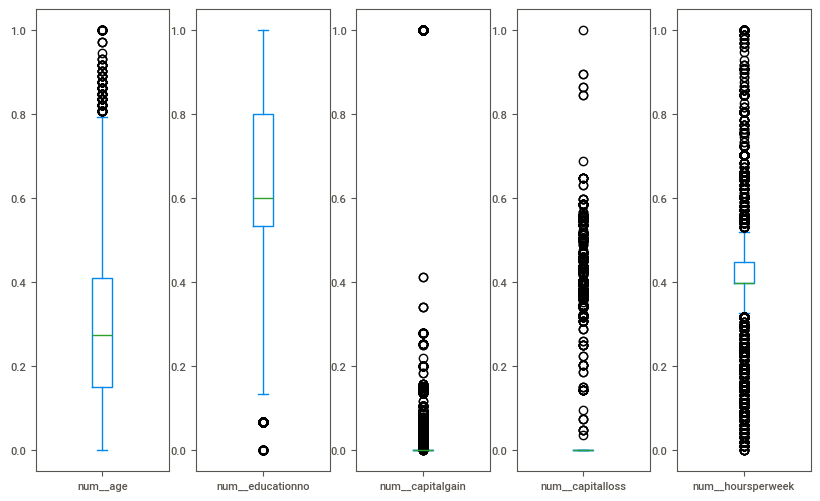

In [82]:
Xtr.iloc[:,0:5].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))
plt.subplot_adjust(wspace = 0.75)
plt.show()

In [84]:
Xtr.columns

Index(['num__age', 'num__educationno', 'num__capitalgain', 'num__capitalloss',
       'num__hoursperweek', 'cat__workclass_ Federal-gov',
       'cat__workclass_ Local-gov', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       ...
       'cat__native_ Portugal', 'cat__native_ Puerto-Rico',
       'cat__native_ Scotland', 'cat__native_ South', 'cat__native_ Taiwan',
       'cat__native_ Thailand', 'cat__native_ Trinadad&Tobago',
       'cat__native_ United-States', 'cat__native_ Vietnam',
       'cat__native_ Yugoslavia'],
      dtype='object', length=102)

In [86]:
columns = ['num__age', 'num__educationno', 'num__hoursperweek']

In [88]:
winsor = Winsorizer(capping_method = 'iqr',
                   tail = 'both',
                   fold = 1.5,
                   variables = columns)

In [90]:
outlier = winsor.fit(Xtr[columns])

In [146]:
joblib.dump(outlier, 'winsor')

['winsor']

In [92]:
Xtr[columns] = outlier.transform(Xtr[columns])

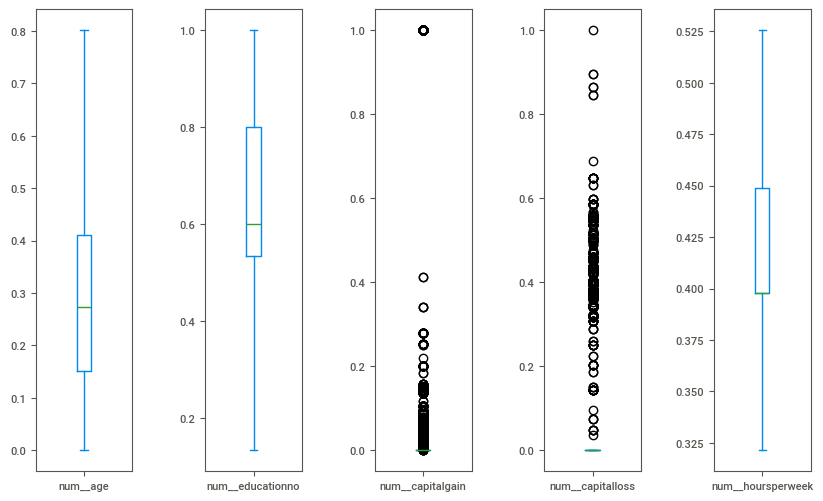

In [94]:
Xtr.iloc[:,0:5].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [96]:
# transform on test data
Xts = pd.DataFrame(X_train_processed.transform(X_test), columns = X_train_processed.get_feature_names_out())


In [98]:
Xts[columns] = outlier.transform(Xts[columns])

In [100]:
# creating and fitting the naive bayes model
model = MultinomialNB()
nb_model = model.fit(Xtr, Y_train)

C:\Newfolder2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
# For Train Dataset
# Making predictions on the test data
predictions = pd.DataFrame(nb_model.predict(Xtr))


In [104]:

# Evaluating the model
accuracy = skmet.accuracy_score(Y_train, predictions)
print('Accuracy:', accuracy)


Accuracy: 0.7928450648188058


In [106]:

# Classification report
classification_report = skmet.classification_report(Y_train, predictions)
print(classification_report)


              precision    recall  f1-score   support

           0       0.91      0.81      0.85     22653
           1       0.56      0.75      0.64      7508

    accuracy                           0.79     30161
   macro avg       0.74      0.78      0.75     30161
weighted avg       0.82      0.79      0.80     30161



In [108]:

# Confusion matrix
confusion_matrix = skmet.confusion_matrix(Y_train, predictions)
print(confusion_matrix)


[[18275  4378]
 [ 1870  5638]]


In [110]:
# For Test Dataset
predictions_test = pd.DataFrame(nb_model.predict(Xts))


In [112]:
# Evaluating the model
accuracy = skmet.accuracy_score(Y_test, predictions_test)
print('Accuracy:', accuracy)

Accuracy: 0.7945551128818061


In [114]:
# Classification report
classification_report = skmet.classification_report(Y_train_1d, predictions)
print(classification_report)

NameError: name 'Y_train_1d' is not defined

In [116]:
Y_train_1d = Y_train.values.ravel()

In [118]:
# Classification report
classification_report = skmet.classification_report(Y_train_1d, predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.81      0.85     22653
           1       0.56      0.75      0.64      7508

    accuracy                           0.79     30161
   macro avg       0.74      0.78      0.75     30161
weighted avg       0.82      0.79      0.80     30161



In [120]:
# Confusion matrix
confusion_matrix = skmet.confusion_matrix(Y_train_1d, predictions)
print(confusion_matrix)

[[18275  4378]
 [ 1870  5638]]


In [122]:
# hyperparameter tunning
# GridSearchCV

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [126]:
# define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 0.05, 50.0, 100.0, 500.0, 1000.0]
}

In [128]:
# creating the gaussian model
model = MultinomialNB()

In [130]:
# create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = 5, error_score = 'raise' )

In [132]:
# fit the GridSearchCV object
grid_search.fit(Xtr, Y_train)

C:\Newfolder2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Newfolder2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Newfolder2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Newfolder2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_

GridSearchCV(cv=5, error_score='raise', estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 0.05, 50.0, 100.0,
                                   500.0, 1000.0]},
             scoring='accuracy')

In [142]:
# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimate = grid_search.best_estimator_

In [146]:
print('best parameters:', best_params)
print('beat score:', best_score)
print('best_estimator:', best_estimate)

best parameters: {'alpha': 100.0}
beat score: 0.8048805618611343
best_estimator: MultinomialNB(alpha=100.0)


In [150]:
predictions = pd.DataFrame(best_estimate.predict(Xtr))

In [152]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,1


In [154]:
import sklearn.metrics as skmet

In [158]:
# evaluating the model
# for train data
accuarcy = skmet.accuracy_score(Y_train, predictions)
print('accuarcy is:', accuarcy)

accuarcy is: 0.803918968203972


In [162]:
# classification report 
classification_report = skmet.classification_report(Y_train, predictions)
print('classification report:', classification_report)

classification report:               precision    recall  f1-score   support

           0       0.88      0.85      0.87     22653
           1       0.60      0.66      0.63      7508

    accuracy                           0.80     30161
   macro avg       0.74      0.76      0.75     30161
weighted avg       0.81      0.80      0.81     30161



In [168]:
# confusion matrics
confusion_matrix = skmet.confusion_matrix(Y_train, predictions)
print(confusion_matrix)

[[19283  3370]
 [ 2544  4964]]


In [170]:
# evaluating the model for test data
predictions_test = pd.DataFrame(best_estimate.predict(Xts))

In [174]:
predictions_test.head()

,0
0,0
1,0
2,1
3,0
4,0


In [180]:
import sklearn.metrics as skmet

In [182]:
# accuracy 
accuarcy = skmet.accuracy_score(Y_test, predictions_test)
print(accuracy)

0.7945551128818061


In [184]:
# classification report
classification_report = skmet.classification_report(Y_test, predictions_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     11360
           1       0.59      0.66      0.62      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.76      0.75     15060
weighted avg       0.81      0.81      0.81     15060



In [190]:
# confusion matrix 
confusion_matrix = skmet.confusion_matrix(Y_test, predictions_test)
print(confusion_matrix)

[[9683 1677]
 [1258 2442]]


In [192]:
predictions = pd.DataFrame(nb_model.predict(Xtr))